In [53]:
import cv2
import numpy as np
import matplotlib

from matplotlib import pyplot as plt

matplotlib.rcParams['figure.figsize'] = (13, 8)

In [54]:
img_rgb = cv2.imread('bc.tif')
cv2.imwrite("assets/input_file.jpg", img_rgb)

True

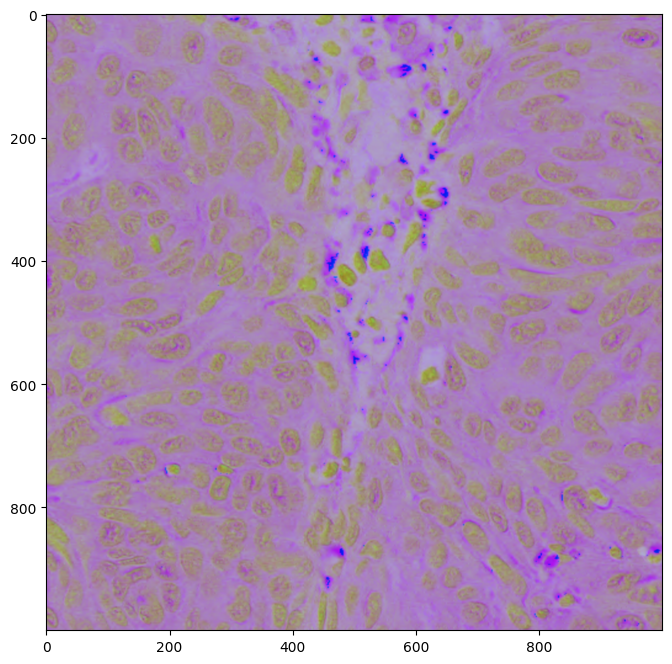

In [55]:
img = cv2.imread('bc.tif')
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(img, cmap='gray', interpolation='bicubic')

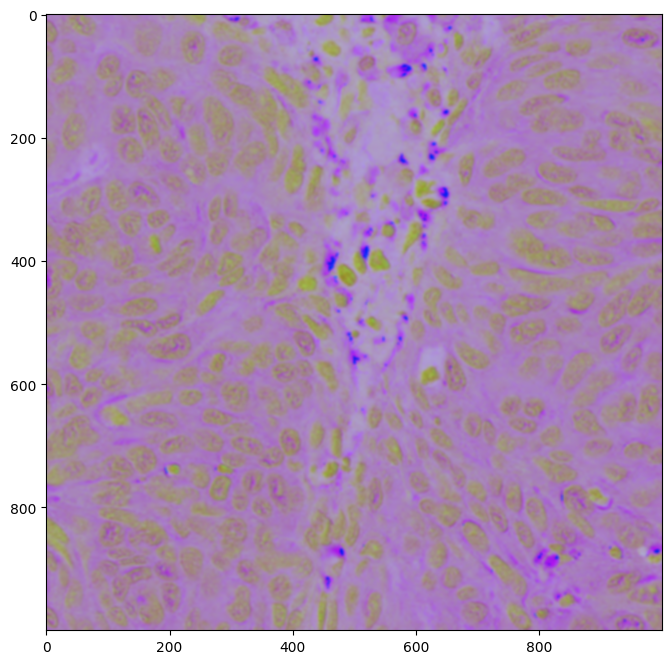

In [56]:
img = cv2.GaussianBlur(img,(5,5),cv2.BORDER_DEFAULT)

plt.imshow(img,cmap='gray', interpolation = 'bicubic')

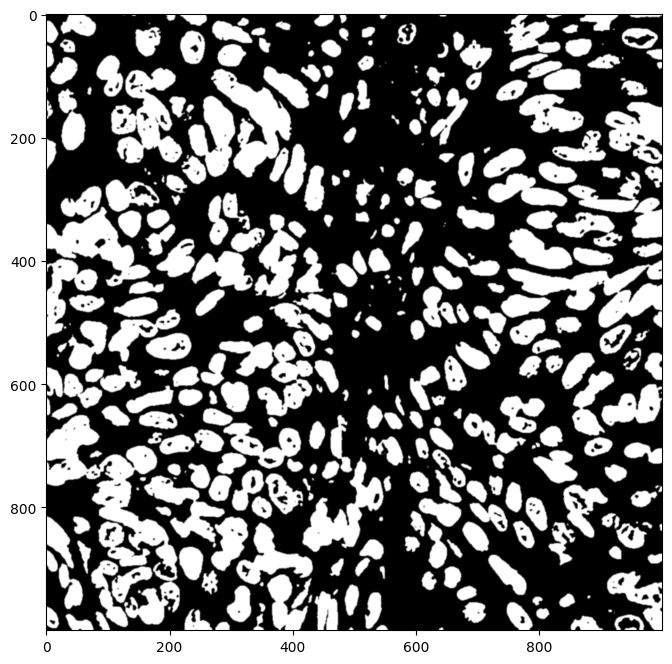

In [57]:
filtered = cv2.inRange(img, (0,0,0), (179, 255, 164))
cv2.imwrite("assets/mask.jpg", filtered)
#HSV 255, 255, 164
plt.imshow(filtered,cmap='gray', interpolation = 'bicubic')

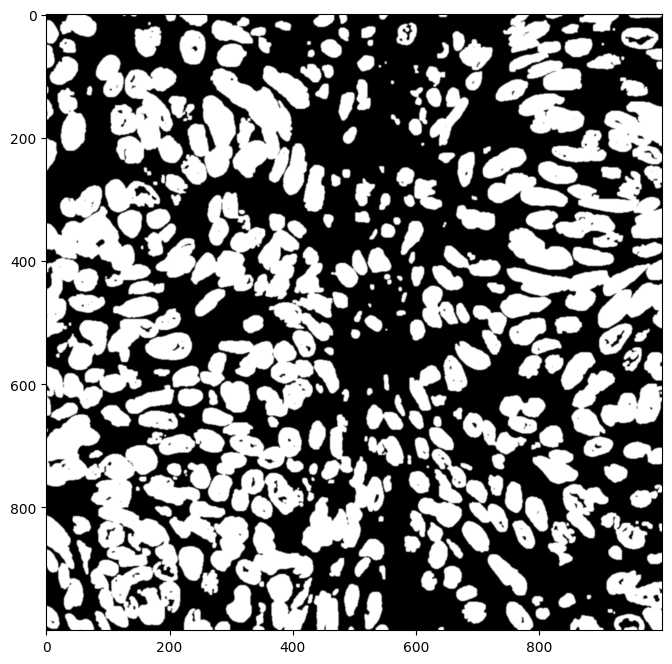

In [58]:
kernel = np.ones((3, 3), np.uint8)
img_dilatated = cv2.dilate(filtered, kernel, iterations=1)
cv2.imwrite("assets/dilatated_mask.jpg", img_dilatated)
plt.imshow(img_dilatated,cmap='gray', interpolation = 'bicubic')

In [59]:
def bin_contours(img, ignore_threshold, bin_threshold):
    cnts,_ = cv2.findContours(img.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    small_contours = []
    big_contours = []
    for c in cnts:
        if cv2.contourArea(c) > bin_threshold:
            big_contours.append(c)
        elif cv2.contourArea(c) > ignore_threshold:
            small_contours.append(c)
    return small_contours, big_contours

small_contours, big_contours = bin_contours(img_dilatated.copy(), 100, 400)

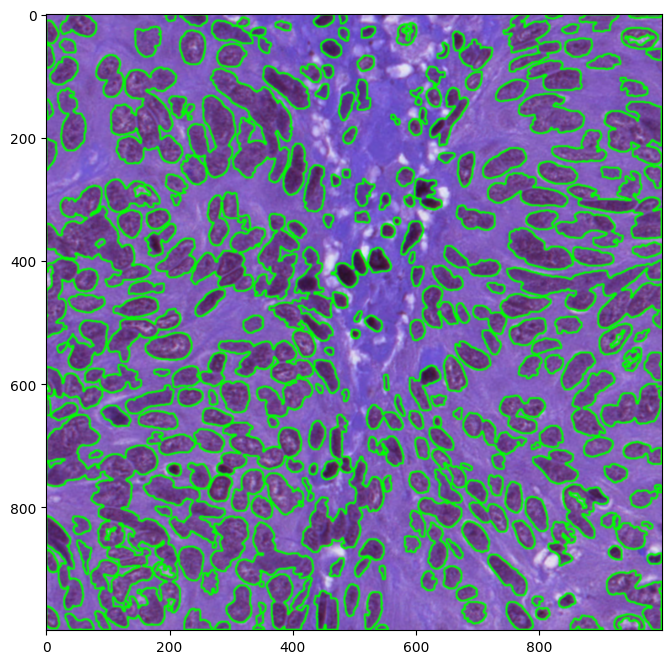

In [60]:
out = img_rgb.copy()
cv2.drawContours(out, small_contours + big_contours, -1, (0, 255, 0), 2)
cv2.imwrite("assets/output_before_bin.jpg", out)
plt.imshow(out, cmap='gray', interpolation='bicubic')

In [61]:
len(small_contours + big_contours)

263

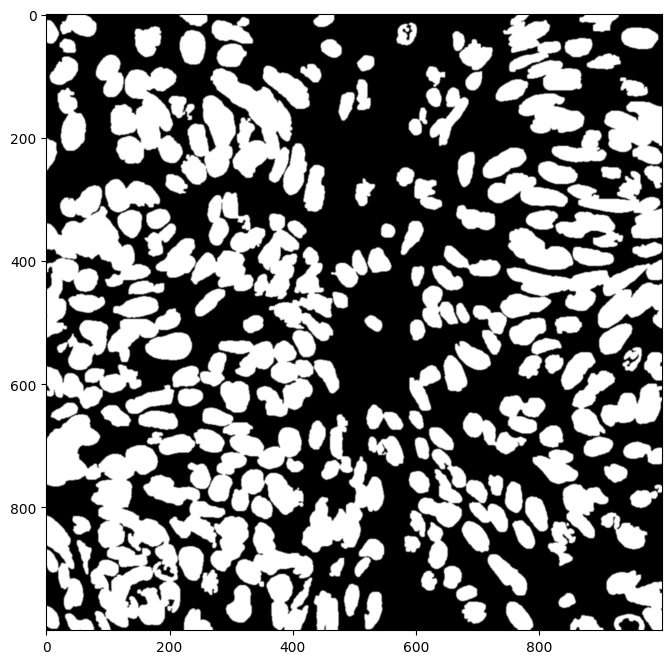

In [62]:
empty_img = img.copy()*0
big_contours_mask = cv2.fillPoly(empty_img, big_contours, (255,255, 255))
big_contours_mask = big_contours_mask[:,:,0]
plt.imshow(big_contours_mask, cmap='gray', interpolation='bicubic')

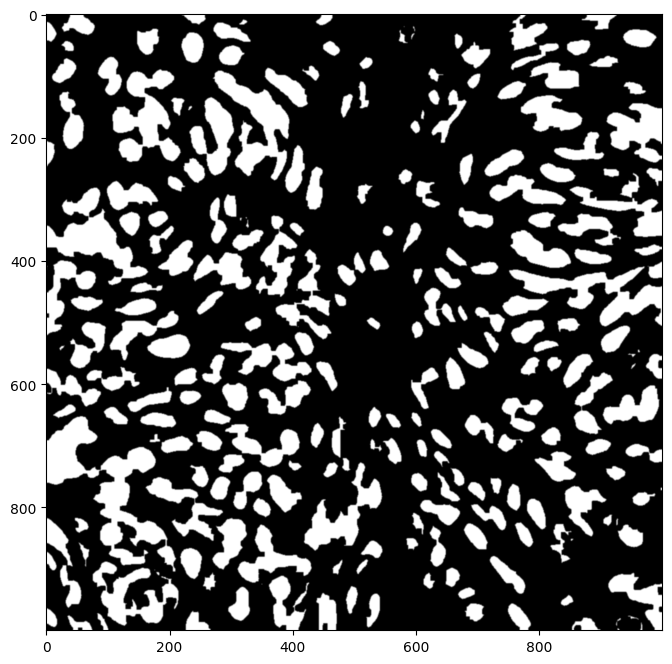

In [63]:
big_contours_erosion = cv2.erode(big_contours_mask, kernel, iterations=3)
plt.imshow(big_contours_erosion, cmap='gray', interpolation='bicubic')

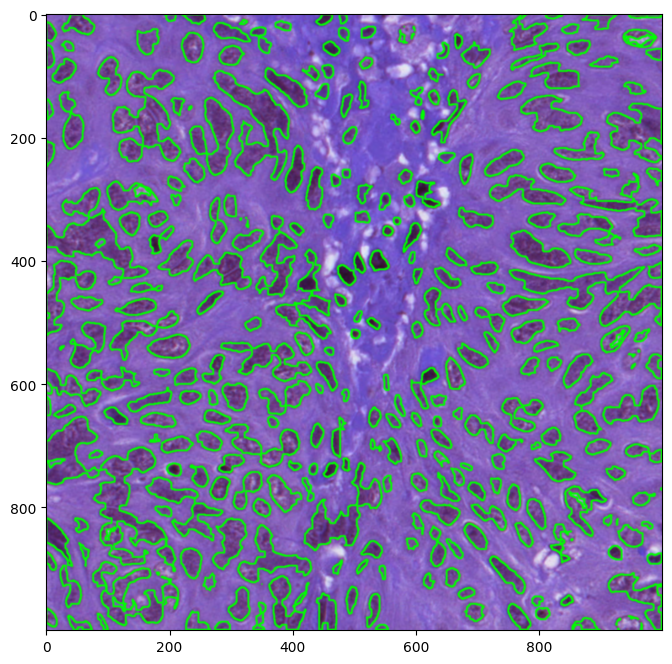

In [64]:
big_contours, _ = cv2.findContours(big_contours_erosion, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
final_contours = small_contours + list(big_contours)
out = img_rgb.copy()
cv2.drawContours(out, final_contours, -1, (0, 255, 0), 2)
cv2.imwrite("assets/output_after_bin.jpg", out)
plt.imshow(out, cmap='gray', interpolation='bicubic')

In [65]:
len(final_contours)

318